In [58]:
import requests
import pandas as pd

# the API request

base_url = 'https://collectionapi.metmuseum.org'
path = '/public/collection/v1/search'
query = '?q=woman'


print(f'{base_url}{path}{query}')

https://collectionapi.metmuseum.org/public/collection/v1/search?q=woman


In [59]:
key

'HHhPAjnfEF2EmLtf9PdGsLEQZizR3iQu'

In [5]:
r = requests.get(f'{base_url}{path}{query}')

In [6]:
r

<Response [200]>

In [7]:
type(r)

requests.models.Response

In [8]:
parsed = r.json()

In [12]:
# how do I get the second item in the list of 'objectIDs'?
parsed['objectIDs'][1]

207162

In [18]:
objects_path = '/public/collection/v1/objects/'

In [27]:
ids = parsed['objectIDs'][:20]

In [46]:
artists = []
titles = []
cultures = []
genders = []
dates = []
departments = []

for item in ids:
    artwork = requests.get(f'{base_url}{objects_path}{item}')
    parsed_art = artwork.json()
    try:
        artist = parsed_art['artistDisplayName']
    except KeyError:
        artist = 'n/a'
    title = parsed_art.get('title')
    culture = parsed_art.get('culture')
    gender = parsed_art.get('artistGender')
    date = parsed_art.get('objectDate')
    department = parsed_art.get('department')

    artists.append(artist)
    titles.append(title)
    cultures.append(culture)
    genders.append(gender)
    dates.append(date)
    departments.append(department)

In [47]:
df = pd.DataFrame({
    'title': titles,
    'artist': artists,
    'culture': cultures,
    'gender': genders,
    'date': dates,
    'department': departments
})

In [51]:
df.value_counts('title')

title
Woman                              16
Terracotta lekythos (oil flask)     1
Name: count, dtype: int64

<Axes: ylabel='count'>

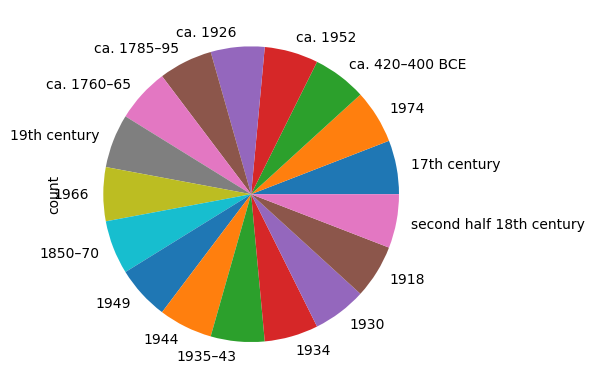

In [57]:
df.value_counts('date').plot(kind = 'pie')

In [2]:
import requests
from keys import key

# query
query = 'migrant'

# base URL
url = f'https://api.nytimes.com/svc/search/v2/articlesearch.json?&q={query}&api-key={key}'
r = requests.get(url)

In [4]:
for item in range(0, 5):
    print(item)

0
1
2
3
4
